In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
dist_funding = pd.read_csv('data/dist_funding.csv')
enrollment = pd.read_csv('data/enrollment.csv')
experience = pd.read_csv('data/experience.csv')
funding = pd.read_csv('data/funding.csv')
graduation = pd.read_csv('data/graduation.csv')

In [204]:
# dist_funding
# enrollment
# experience
# funding
graduation
graduation = graduation.groupby(['School']).sum()
graduation = graduation.reset_index()
graduation['graduation_rate'] = graduation['Graduates'] / graduation['Total']
# Drop Regents Advanced Designation, Regents Diploma, Local Diploma, Still Enrolled, Dropout, GED Transfer
graduation = graduation.drop(['Regents Advanced Designation', 'Regents Diploma', 'Local Diploma', 'Still Enrolled', 'Dropout', 'GED Transfer', 'Graduates'], axis=1)
graduation

/var/folders/kc/qmz7hwmj24q4ycnfhfpqwbqh0000gn/T/ipykernel_65558/4002289797.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graduation = graduation.groupby(['School']).sum()


,School,Total,graduation_rate
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,3110,0.803859
1,A-TECH HIGH SCHOOL,770,0.712987
2,ABRAHAM LINCOLN HIGH SCHOOL,4010,0.801496
3,ACAD FOR CAREERS-TELEVISION-FILM,1410,0.765957
4,ACAD FOR COLLEGE PREP AND CAREER EXP,370,0.621622
...,...,...,...
475,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,610,0.829508
476,YOUNG WOMEN'S LEADERSHIP SCHOOL,740,0.567568
477,YOUNG WOMEN'S LRDSHP-QUEENS,770,0.871429
478,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,590,0.842373


In [205]:
funding = funding.groupby('School').sum()
funding = funding.reset_index()
funding

/var/folders/kc/qmz7hwmj24q4ycnfhfpqwbqh0000gn/T/ipykernel_65558/3886837638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  funding = funding.groupby('School').sum()


,School,Needs,School_exp,Classroom_Salary,Other_Inst_Salary,Inst_Benefits,Prof_Dev,Admin_Salary,Admin_Benefits,Other_Salaries,Other_Benefits,Other_Exp
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,1,21322.18,5559.35,1170.16,3371.84,0.00,896.29,449.09,793.91,397.79,963.98
1,A-TECH HIGH SCHOOL,1,32050.35,9038.17,2162.82,5612.29,694.56,1140.87,571.64,1352.44,677.64,3080.16
2,ABRAHAM LINCOLN HIGH SCHOOL,1,21281.89,6149.46,1136.92,3650.86,0.00,694.34,347.90,715.58,358.54,508.51
3,ACAD FOR CAREERS-TELEVISION-FILM,1,22144.97,6103.52,1569.49,3844.59,6.77,749.05,375.31,703.07,352.27,721.13
4,ACAD FOR COLLEGE PREP AND CAREER EXP,1,24138.84,5764.27,2065.97,3923.37,0.00,1887.12,945.55,737.27,369.41,726.12
...,...,...,...,...,...,...,...,...,...,...,...,...
448,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,1,22237.62,6088.54,1241.62,3672.80,82.93,782.16,391.90,310.69,155.67,1791.55
449,YOUNG WOMEN'S LEADERSHIP SCHOOL,1,20352.48,6004.90,818.21,3418.74,0.00,938.52,470.25,402.73,201.79,377.59
450,YOUNG WOMEN'S LRDSHP-QUEENS,1,19208.58,5680.16,562.31,3127.80,0.00,784.49,393.07,202.83,101.63,636.53
451,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,1,22949.52,6059.45,1550.88,3813.18,63.66,1229.97,616.28,451.40,226.18,1218.75


In [206]:
enrollment.columns

Index(['District', 'School', 'Grade', 'Total', 'Male', 'Female', 'Non-binary',
       'American Indian/Alaska Native', 'Black', 'Hispanic/Latino',
       'Asian/Hawaiian/Pacific Islander', 'White', 'Multiracial',
       'Learning English', 'Disabilities', 'Economically Disadvantaged',
       'Migrant', 'Homeless', 'Foster Care', 'Parents In Armed Forces'],
      dtype='object')

In [207]:
enrollment = enrollment[enrollment['Grade'] == 12].groupby('School').sum()
enrollment = enrollment.reset_index()
enrollment['Male'] = enrollment['Male'].clip(lower=0)
enrollment['Female'] = enrollment['Female'].clip(lower=0)
enrollment['Asian/Hawaiian/Pacific Islander'] = enrollment['Asian/Hawaiian/Pacific Islander'].clip(lower=0)
enrollment['Black'] = enrollment['Black'].clip(lower=0)
enrollment['Hispanic/Latino'] = enrollment['Hispanic/Latino'].clip(lower=0)
enrollment['White'] = enrollment['White'].clip(lower=0)
enrollment['Multiracial'] = enrollment['Multiracial'].clip(lower=0)
enrollment['American Indian/Alaska Native'] = enrollment['American Indian/Alaska Native'].clip(lower=0)
enrollment['Learning English'] = enrollment['Learning English'].clip(lower=0)
enrollment['Disabilities'] = enrollment['Disabilities'].clip(lower=0)
enrollment['Economically Disadvantaged'] = enrollment['Economically Disadvantaged'].clip(lower=0)
enrollment['Homeless'] = enrollment['Homeless'].clip(lower=0)

enrollment['male_pct'] = enrollment['Male'] / enrollment['Total']
enrollment['female_pct'] = enrollment['Female'] / enrollment['Total']
enrollment['asian_pct'] = enrollment['Asian/Hawaiian/Pacific Islander'] / enrollment['Total']
enrollment['black_pct'] = enrollment['Black'] / enrollment['Total']
enrollment['hispanic_pct'] = enrollment['Hispanic/Latino'] / enrollment['Total']
enrollment['white_pct'] = enrollment['White'] / enrollment['Total']
# enrollment['multi_pct'] = enrollment['Multiracial'] / enrollment['Total']
# enrollment['native_pct'] = enrollment['American Indian/Alaska Native'] / enrollment['Total']
enrollment['learning_english_pct'] = enrollment['Learning English'] / enrollment['Total']
enrollment['disability_pct'] = enrollment['Disabilities'] / enrollment['Total']
enrollment['poverty_pct'] = enrollment['Economically Disadvantaged'] / enrollment['Total']
# enrollment['homeless_pct'] = enrollment['Homeless'] / enrollment['Total']

# Drop All the above columns like Male, Female, Asian/Hawaiian/Pacific Islander, Black, Hispanic, White, Multiracial, American Indian/Alaska Native, Learning English, Disabilities, Economically Disadvantaged, Homeless
enrollment = enrollment.drop(["Male", "Female", "Asian/Hawaiian/Pacific Islander", "Black", "Hispanic/Latino", "White", "Multiracial", "American Indian/Alaska Native", "Learning English", "Disabilities", "Economically Disadvantaged", "Homeless", "Migrant", "Foster Care", "Parents In Armed Forces", "Non-binary", "Grade"], axis=1)
enrollment


/var/folders/kc/qmz7hwmj24q4ycnfhfpqwbqh0000gn/T/ipykernel_65558/3614602401.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  enrollment = enrollment[enrollment['Grade'] == 12].groupby('School').sum()


,School,Total,male_pct,female_pct,asian_pct,black_pct,hispanic_pct,white_pct,learning_english_pct,disability_pct,poverty_pct
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,225,0.471111,0.528889,0.097778,0.280000,0.591111,0.017778,0.111111,0.111111,0.871111
1,A-TECH HIGH SCHOOL,73,0.904110,0.095890,0.027397,0.438356,0.506849,0.000000,0.000000,0.287671,0.876712
2,ABRAHAM LINCOLN HIGH SCHOOL,349,0.573066,0.426934,0.151862,0.444126,0.263610,0.126074,0.131805,0.174785,0.785100
3,ACAD FOR CAREERS-TELEVISION-FILM,136,0.485294,0.514706,0.088235,0.147059,0.529412,0.161765,0.036765,0.169118,0.595588
4,ACAD FOR COLLEGE PREP AND CAREER EXP,34,0.558824,0.441176,0.029412,0.823529,0.088235,0.058824,0.000000,0.000000,0.705882
...,...,...,...,...,...,...,...,...,...,...,...
475,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,61,0.000000,1.000000,0.032787,0.409836,0.524590,0.016393,0.081967,0.131148,0.770492
476,YOUNG WOMEN'S LEADERSHIP SCHOOL,73,0.013699,0.986301,0.054795,0.260274,0.547945,0.027397,0.000000,0.191781,0.739726
477,YOUNG WOMEN'S LRDSHP-QUEENS,77,0.000000,1.000000,0.454545,0.324675,0.129870,0.012987,0.000000,0.129870,0.844156
478,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,60,0.000000,1.000000,0.066667,0.316667,0.500000,0.033333,0.083333,0.283333,0.816667


In [208]:
graduation = pd.merge(graduation, enrollment, on='School')
graduation = pd.merge(graduation, funding, on='School')
experience = experience.rename(columns={'Districts' : 'District'})
graduation = pd.merge(graduation, experience, on='School')
graduation

# Rename column 21+ as 21plus
graduation = graduation.rename(columns={'21+': 'plus_21'})
# Reanme column 4_20 as four_twenty
graduation = graduation.rename(columns={'4_20': 'four_twenty'})

In [209]:
graduation.columns
# Check if the values of Total_x and Total_y are the same
if graduation['Total_x'].equals(graduation['Total_y']):
    graduation = graduation.drop(['Total_y'], axis=1)
graduation = graduation.rename(columns={'Total_x': 'Total'})
graduation.columns

Index(['School', 'Total', 'graduation_rate', 'Total_y', 'male_pct',
       'female_pct', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct',
       'learning_english_pct', 'disability_pct', 'poverty_pct', 'Needs',
       'School_exp', 'Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits',
       'Prof_Dev', 'Admin_Salary', 'Admin_Benefits', 'Other_Salaries',
       'Other_Benefits', 'Other_Exp', 'District', 'S_T_Ratio', 'lt_4',
       'four_twenty', 'plus_21'],
      dtype='object')

In [210]:
# Build a correlation matrix for the graduation dataframe
corr = graduation.corr()
corr

/var/folders/kc/qmz7hwmj24q4ycnfhfpqwbqh0000gn/T/ipykernel_65558/644179536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = graduation.corr()


,Total,graduation_rate,Total_y,male_pct,female_pct,asian_pct,black_pct,hispanic_pct,white_pct,learning_english_pct,...,Prof_Dev,Admin_Salary,Admin_Benefits,Other_Salaries,Other_Benefits,Other_Exp,S_T_Ratio,lt_4,four_twenty,plus_21
Total,1.000000,0.179026,0.986568,-0.015595,0.015595,0.501040,-0.280721,-0.217349,0.345454,-0.053211,...,-0.133973,-0.369728,-0.369728,-0.209558,-0.209557,-0.190281,0.444965,-0.191465,0.088453,0.209901
graduation_rate,0.179026,1.000000,0.221994,-0.065621,0.065621,0.216741,-0.190476,-0.062320,0.205108,-0.033636,...,-0.169387,-0.615832,-0.615833,-0.506408,-0.506409,-0.221910,0.455724,0.074262,0.023216,-0.178155
Total_y,0.986568,0.221994,1.000000,-0.011775,0.011775,0.518432,-0.278542,-0.240149,0.360801,-0.082992,...,-0.139451,-0.404190,-0.404191,-0.245795,-0.245794,-0.223324,0.475977,-0.188219,0.093717,0.195239
male_pct,-0.015595,-0.065621,-0.011775,1.000000,-1.000000,-0.059688,0.133293,-0.029205,-0.097805,0.022629,...,0.086568,0.095341,0.095342,0.171410,0.171409,0.073690,-0.100564,0.000312,-0.060380,0.101759
female_pct,0.015595,0.065621,0.011775,-1.000000,1.000000,0.059688,-0.133293,0.029205,0.097805,-0.022629,...,-0.086568,-0.095341,-0.095342,-0.171410,-0.171409,-0.073690,0.100564,-0.000312,0.060380,-0.101759
asian_pct,0.501040,0.216741,0.518432,-0.059688,0.059688,1.000000,-0.398578,-0.394536,0.300083,-0.031962,...,-0.129066,-0.352927,-0.352927,-0.273887,-0.273886,-0.285553,0.408812,-0.190013,0.153217,0.098696
black_pct,-0.280721,-0.190476,-0.278542,0.133293,-0.133293,-0.398578,1.000000,-0.523858,-0.384316,-0.284973,...,0.108817,0.245720,0.245720,0.116564,0.116564,0.047897,-0.218788,0.037395,-0.073368,0.055079
hispanic_pct,-0.217349,-0.062320,-0.240149,-0.029205,0.029205,-0.394536,-0.523858,1.000000,-0.381937,0.407790,...,0.042708,0.163857,0.163857,0.192098,0.192098,0.335393,-0.198217,0.197808,-0.172193,-0.081420
white_pct,0.345454,0.205108,0.360801,-0.097805,0.097805,0.300083,-0.384316,-0.381937,1.000000,-0.148807,...,-0.112759,-0.309578,-0.309578,-0.231988,-0.231988,-0.335969,0.277884,-0.187307,0.235411,-0.047747
learning_english_pct,-0.053211,-0.033636,-0.082992,0.022629,-0.022629,-0.031962,-0.284973,0.407790,-0.148807,1.000000,...,0.025275,0.128555,0.128555,0.188029,0.188030,0.299503,-0.138837,0.064807,-0.072208,-0.000494


In [211]:
# Print the best features for the graduation rate 
print(corr['graduation_rate'].sort_values(ascending=False)[:10], '\n')

graduation_rate         1.000000
S_T_Ratio               0.455724
Total_y                 0.221994
asian_pct               0.216741
white_pct               0.205108
Total                   0.179026
lt_4                    0.074262
female_pct              0.065621
four_twenty             0.023216
learning_english_pct   -0.033636
Name: graduation_rate, dtype: float64 



In [212]:
# Rename column 21+ as 21plus
graduation = graduation.rename(columns={'21+': 'plus_21'})
# Reanme column 4_20 as four_twenty
graduation = graduation.rename(columns={'4_20': 'four_twenty'})




In [213]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Build a model on all the features of graduation
eval_cols = graduation.drop(['School', 'graduation_rate', 'District', 'Needs', 'Total_y'], axis=1)
# eval_cols = eval_cols.drop(['Total', 'Total_y'], axis=1)
# eval_cols = eval_cols.drop(['male_pct', 'female_pct'], axis=1)
# eval_cols = eval_cols.drop([x for x in graduation.columns if "pct" in x], axis=1)
#eval_cols = eval_cols.drop(['S_T_Ratio', "lt_4", "four_twenty", "plus_21"], axis=1)
# eval_cols = eval_cols.drop([x for x in funding.columns if x in eval_cols.columns], axis=1)
columns = list(eval_cols)#
X = columns
y = graduation['graduation_rate']
print(X)
formula = 'graduation_rate ~ ' + ' + '.join(X)
model = smf.ols(formula=formula, data=graduation).fit()
print(model.summary())
# print(model.params)

['Total', 'male_pct', 'female_pct', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'learning_english_pct', 'disability_pct', 'poverty_pct', 'School_exp', 'Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits', 'Prof_Dev', 'Admin_Salary', 'Admin_Benefits', 'Other_Salaries', 'Other_Benefits', 'Other_Exp', 'S_T_Ratio', 'lt_4', 'four_twenty', 'plus_21']
                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     22.02
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.09e-58
Time:                        23:52:57   Log-Likelihood:                 306.83
No. Observations:                 455   AIC:                            -565.7
Df Residuals:                     431   BIC:                            -466.8
Df Mod

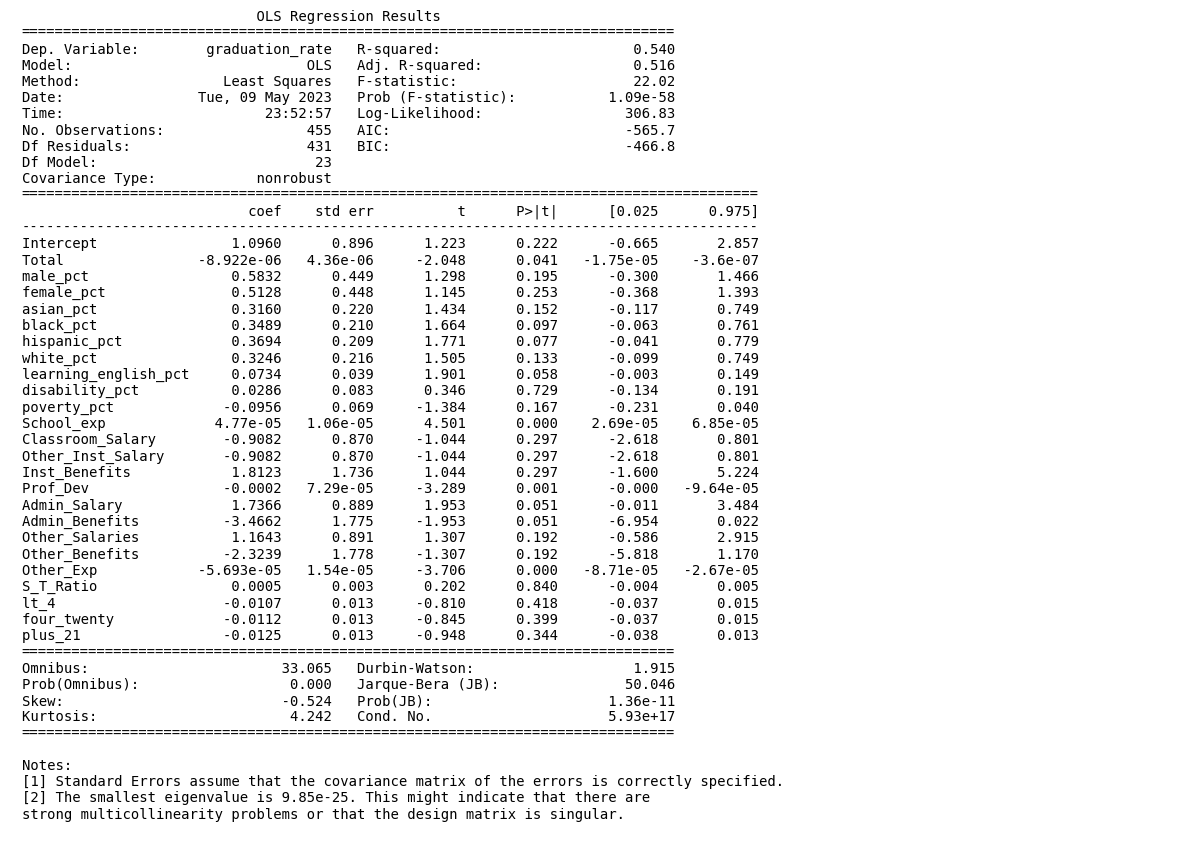

In [214]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [215]:
# Make a better model by using the best predictors using p-values
p_values = model.pvalues
p_values = p_values.drop(['Intercept'])
p_values = p_values.sort_values(ascending=True)
p_values = p_values[p_values < 0.05]
p_values = p_values.index
features = list(p_values)
print(features)
# Drop the features that start with District[.....]
features = [x for x in features if not x.startswith('District')]
print(features)
# Build a model on the best features
formula = 'graduation_rate ~ ' + ' + '.join(features)
model = smf.ols(formula=formula, data=graduation).fit()
print("\n")
print(model.summary())

['School_exp', 'Other_Exp', 'Prof_Dev', 'Total']
['School_exp', 'Other_Exp', 'Prof_Dev', 'Total']


                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     71.44
Date:                Tue, 09 May 2023   Prob (F-statistic):           8.05e-47
Time:                        23:52:58   Log-Likelihood:                 241.92
No. Observations:                 455   AIC:                            -473.8
Df Residuals:                     450   BIC:                            -453.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [216]:
params = model.params.sort_values(ascending = False)
params

Intercept     1.255500
Other_Exp     0.000027
Total        -0.000003
School_exp   -0.000022
Prof_Dev     -0.000143
dtype: float64

In [217]:
# Build a model on the best correlating features of graduation 
corr_list = list(corr['graduation_rate'].sort_values(ascending=False)[:10].index)
# The features aren't all correlating and we can change the slice to get better features - this is just an example
X = corr_list[1:]
y = graduation['graduation_rate']
formula = 'graduation_rate ~ ' + ' + '.join(X)
model_better = smf.ols(formula=formula, data=graduation).fit()
print(model_better.summary())

                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     19.07
Date:                Tue, 09 May 2023   Prob (F-statistic):           5.30e-27
Time:                        23:52:58   Log-Likelihood:                 204.26
No. Observations:                 455   AIC:                            -388.5
Df Residuals:                     445   BIC:                            -347.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1575 

In [218]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

graduation['target'] = (graduation['graduation_rate'] >= 0.85).astype(int)

# Build a model on all the features of graduation
eval_cols = graduation.drop(['School', 'graduation_rate', 'District', 'Needs', 'Total_y', 'target'], axis=1)
# eval_cols = eval_cols.drop(['Total', 'Total_y'], axis=1)
# eval_cols = eval_cols.drop(['male_pct', 'female_pct'], axis=1)
# eval_cols = eval_cols.drop([x for x in graduation.columns if "pct" in x], axis=1)
#eval_cols = eval_cols.drop(['S_T_Ratio', "lt_4", "four_twenty", "plus_21"], axis=1)
# eval_cols = eval_cols.drop([x for x in funding.columns if x in eval_cols.columns], axis=1)
# Create the feature matrix X and the target variable y
X = eval_cols
y = graduation['target']

# Fit the logistic regression model using sm.Logit
model = sm.Logit(y, sm.add_constant(X)).fit()

# Print the summary of the model
print(model.summary())
# print(model.params)

         Current function value: 0.462042
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                           23
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.1721
Time:                        23:52:58   Log-Likelihood:                -210.23
converged:                      False   LL-Null:                       -253.92
Covariance Type:            nonrobust   LLR p-value:                 1.944e-09
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3964        nan        nan        nan         nan         nan
Total                   -0.0002   8

/Users/owenralbovsky/ORIE3120/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
print(graduation.columns)

Index(['School', 'Total', 'graduation_rate', 'Total_y', 'male_pct',
       'female_pct', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct',
       'learning_english_pct', 'disability_pct', 'poverty_pct', 'Needs',
       'School_exp', 'Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits',
       'Prof_Dev', 'Admin_Salary', 'Admin_Benefits', 'Other_Salaries',
       'Other_Benefits', 'Other_Exp', 'District', 'S_T_Ratio', 'lt_4',
       'four_twenty', 'plus_21', 'target'],
      dtype='object')


In [220]:
print(graduation['graduation_rate'])

0      0.803859
1      0.712987
2      0.801496
3      0.765957
4      0.621622
         ...   
450    0.829508
451    0.567568
452    0.871429
453    0.842373
454    0.784000
Name: graduation_rate, Length: 455, dtype: float64


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the columns to use for the prediction
cols = ['Admin_Salary', 'Total', 'disability_pct', 'Other_Salaries', 'Admin_Benefits', 'Other_Benefits', 'Other_Inst_Salary', 'Classroom_Salary', 'learning_english_pct', 'Prof_Dev', 'Other_Exp', 'School_exp', 'white_pct', 'asian_pct', 'poverty_pct', 'black_pct', 'hispanic_pct', 'Inst_Benefits']

graduation['target'] = (graduation['graduation_rate'] >= .90).astype(int)

print("Over 90: ", len(graduation[graduation['graduation_rate'] >= .90]))

# Create the feature matrix X and the target variable y
X = graduation[cols]
y = graduation['target'] >= 1

print(graduation['graduation_rate'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print(X_test.columns)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Over 90:  42
0      0.803859
1      0.712987
2      0.801496
3      0.765957
4      0.621622
         ...   
450    0.829508
451    0.567568
452    0.871429
453    0.842373
454    0.784000
Name: graduation_rate, Length: 455, dtype: float64
Index(['Admin_Salary', 'Total', 'disability_pct', 'Other_Salaries',
       'Admin_Benefits', 'Other_Benefits', 'Other_Inst_Salary',
       'Classroom_Salary', 'learning_english_pct', 'Prof_Dev', 'Other_Exp',
       'School_exp', 'white_pct', 'asian_pct', 'poverty_pct', 'black_pct',
       'hispanic_pct', 'Inst_Benefits'],
      dtype='object')
Accuracy: 0.86


In [222]:
east_side_school = graduation[graduation['School'] == 'EAST SIDE COMMUNITY SCHOOL']
fund_cols = east_side_school[(x for x in funding.columns if x in eval_cols.columns)]

X = east_side_school[cols]

print(X.columns)

funds = east_side_school[['Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits', 'Prof_Dev', 'Admin_Salary', 'Admin_Benefits', 'Other_Salaries', 'Other_Benefits', 'Other_Exp']].sum(axis=1)
for i in funds:
    funds = i

Index(['Admin_Salary', 'Total', 'disability_pct', 'Other_Salaries',
       'Admin_Benefits', 'Other_Benefits', 'Other_Inst_Salary',
       'Classroom_Salary', 'learning_english_pct', 'Prof_Dev', 'Other_Exp',
       'School_exp', 'white_pct', 'asian_pct', 'poverty_pct', 'black_pct',
       'hispanic_pct', 'Inst_Benefits'],
      dtype='object')


In [225]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
def objective(x):
    return ~model.predict(x.reshape(1, -1))

# Define the constraints
def constraint(x):
    return funds - np.sum(x)

constraints = [{'type': 'eq', 'fun': constraint}]

# Set the initial guess
x0 = np.zeros(len(X.columns))

# Set the bounds for the optimization
bounds = [(0, funds) for _ in range(len(X.columns))]

# Perform the optimization
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal values
optimal_values = result.x

# Print the values
for col, val in zip(X.columns, optimal_values):
    print(f"{col}: {val}")


16331.380000000001
0.0


/Users/owenralbovsky/ORIE3120/venv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/owenralbovsky/ORIE3120/venv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.